# Table of Contents
 <p><div class="lev1 toc-item"><a href="#数据整理与清洗" data-toc-modified-id="数据整理与清洗-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据整理与清洗</a></div><div class="lev1 toc-item"><a href="#UFO长啥样？" data-toc-modified-id="UFO长啥样？-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>UFO长啥样？</a></div><div class="lev1 toc-item"><a href="#UFO在美国那些州（state）出现的次数比较多？" data-toc-modified-id="UFO在美国那些州（state）出现的次数比较多？-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>UFO在美国那些州（state）出现的次数比较多？</a></div><div class="lev1 toc-item"><a href="#UFO在哪些年份出现的次数较多？" data-toc-modified-id="UFO在哪些年份出现的次数较多？-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>UFO在哪些年份出现的次数较多？</a></div><div class="lev1 toc-item"><a href="#1997年以后的UFO事件分析" data-toc-modified-id="1997年以后的UFO事件分析-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>1997年以后的UFO事件分析</a></div>

真心讲，长这么大，还有见过UFO长啥样，偶然看到美国UFO报告中心有关于UFO时间记录的详细信息，突然想分析下这些记录里都包含了那些有趣的信息，于是有了这次的分析过程。

当然，原始数据包含的记录信息比较多，我只是进了了比较简单的分析，有兴趣的童鞋可以一起来分析，别忘了也给大家分享下您的分析情况哦。

本次分析的主要内容涉及以下几个方面：


* UFO长啥样？
* UFO在哪些地方出现的次数较多？
* UFO在哪些年份出现的次数较多？
* 热力图同时显示哪些州和哪些年UFO出现次数最多

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

# 数据整理与清洗

In [25]:
df =  pd.read_csv('nuforc_events.csv')

In [26]:
print(df.shape) # 查看数据的结构
print(df.head())

(110265, 13)
             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle  5-6 minutes   
4      Denver    CO     Light       1 hour   

                                             Summary  \
0    I observed an aircraft that seemed to look odd.   
1  Bridgeview, IL, blue light.  ((anonymous report))   
2                               Silent triangle UFO.   
3  My friend and I stepped outside hoping

* 由于存在许多包含NaN的数据信息，在进行分析之前，先用dropna()方法去除包含NaN的行数

In [27]:
df_clean = df.dropna() 
print(df_clean.shape) # 查看去除Nan后还有多少行
print(df_clean.head())

(95004, 13)
             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle  5-6 minutes   
4      Denver    CO     Light       1 hour   

                                             Summary  \
0    I observed an aircraft that seemed to look odd.   
1  Bridgeview, IL, blue light.  ((anonymous report))   
2                               Silent triangle UFO.   
3  My friend and I stepped outside hoping 

* 由于1900年以前的数据较少，这里选择1900年以后的数据来进行分析，如下：

In [28]:
df_clean = df_clean[df_clean['Year']>=1900] # 获取1900年以后的数据来进行分析

* 查看导入的每列数据的数据类型，通过运行结果，可以看到，“Event_Date”列并不是日期类型，因此要将之转换。
* 可以采用pd.to_datetime()方法来操作

In [29]:
df_clean.dtypes

Event_Time     object
Event_Date     object
Year          float64
Month         float64
Day           float64
Hour          float64
Minute        float64
City           object
State          object
Shape          object
Duration       object
Summary        object
Event_URL      object
dtype: object

* 用pd.to_datetime()方法来将str格式的日期转换成日期类型

In [30]:
pd.to_datetime(df_clean['Event_Date']) # 1061-12-31年不能显示
# OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1061-12-31 00:00:00
df_clean.dtypes

Event_Time     object
Event_Date     object
Year          float64
Month         float64
Day           float64
Hour          float64
Minute        float64
City           object
State          object
Shape          object
Duration       object
Summary        object
Event_URL      object
dtype: object

# UFO长啥样？

* 按UFO出现的形状类型来分析,统计不同类型的UFO出现的次数

In [31]:
s_shape = df_clean.groupby('Shape')['Event_Date'].count()
print(type(s_shape))
s_shape.sort_values(inplace=True)
s_shape

<class 'pandas.core.series.Series'>


Shape
Changed          1
Hexagon          1
Pyramid          1
Flare            1
Round            2
Crescent         2
Delta            7
Cross          287
Cone           383
Egg            842
Teardrop       866
Chevron       1187
Diamond       1405
Cylinder      1495
Rectangle     1620
Flash         1717
Cigar         2313
Changing      2378
Formation     3070
Oval          4332
Disk          5841
Sphere        6482
Other         6658
Unknown       6887
Fireball      7785
Triangle      9358
Circle        9818
Light        20254
Name: Event_Date, dtype: int64

剔除特殊情况
* 剔除出现次数少于10次的类型
* 剔除“Unknown”及“Other”类型

In [32]:
s_shape_normal = s_shape[s_shape.values>10]
s_shape_normal

Shape
Cross          287
Cone           383
Egg            842
Teardrop       866
Chevron       1187
Diamond       1405
Cylinder      1495
Rectangle     1620
Flash         1717
Cigar         2313
Changing      2378
Formation     3070
Oval          4332
Disk          5841
Sphere        6482
Other         6658
Unknown       6887
Fireball      7785
Triangle      9358
Circle        9818
Light        20254
Name: Event_Date, dtype: int64

In [33]:
s_shape_normal = s_shape_normal[s_shape_normal.index.isin(['Unknown', 'Other'])==False]
s_shape_normal

Shape
Cross          287
Cone           383
Egg            842
Teardrop       866
Chevron       1187
Diamond       1405
Cylinder      1495
Rectangle     1620
Flash         1717
Cigar         2313
Changing      2378
Formation     3070
Oval          4332
Disk          5841
Sphere        6482
Fireball      7785
Triangle      9358
Circle        9818
Light        20254
Name: Event_Date, dtype: int64

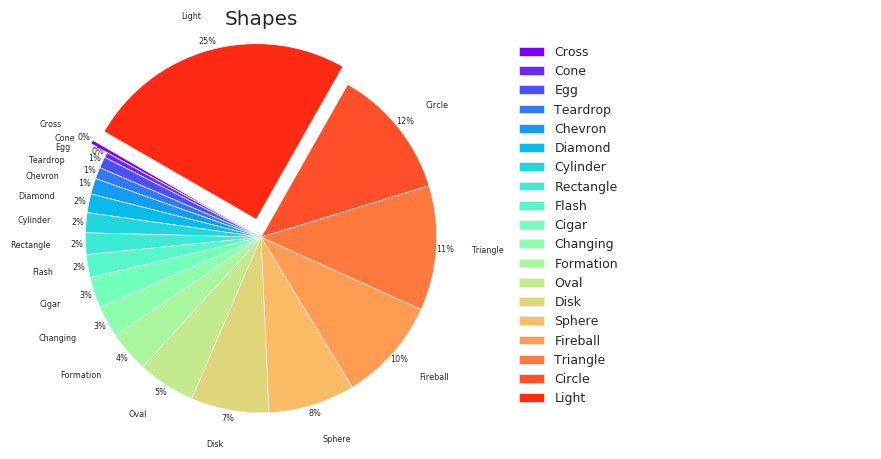

In [47]:
from matplotlib import font_manager as fm
from  matplotlib import cm

labels = s_shape_normal.index
sizes = s_shape_normal.values

explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1)  # "explode" ， show the selected slice 

fig, axes = plt.subplots(figsize=(10,5),ncols=2) # 设置绘图区域大小
ax1, ax2 = axes.ravel()

colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',explode=explode,
        shadow=False, startangle=150, colors=colors, labeldistance=1.2,pctdistance=1.05, radius=0.95)
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

ax1.axis('equal')  

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size('xx-small') 
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Shapes', loc='center')

# ax2 只显示图例（legend）
ax2.axis('off')
ax2.legend(patches, labels, loc='center left', fontsize=9)

# plt.tight_layout()
# plt.savefig("pie_shape_ufo.png", bbox_inches='tight')
plt.savefig('ufo_shapes.jpg')
plt.show()

# UFO在美国那些州（state）出现的次数比较多？

按"State"进行分组运算，统计ufo在各个州出现的次数

In [35]:
s_state = df_clean.groupby('State')['Event_Date'].count()
print(type(s_state))
s_state.head()

<class 'pandas.core.series.Series'>


State
AB     438
AK     472
AL     930
AR     791
AZ    3488
Name: Event_Date, dtype: int64

将分析得到的结果进行可视化显示，如下：

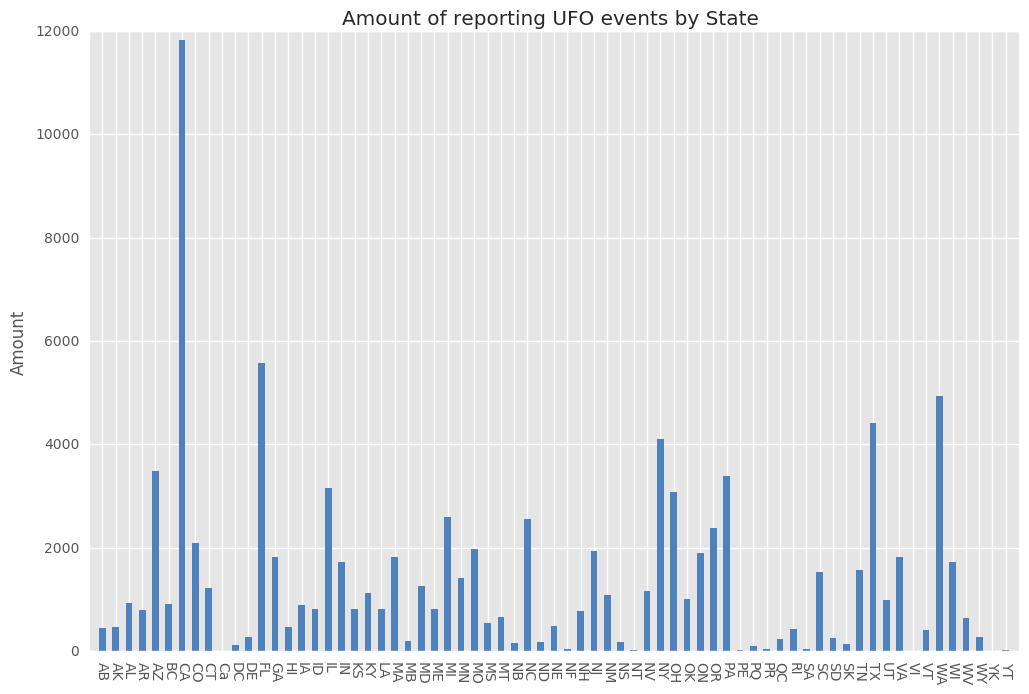

In [36]:
fig, ax1 = plt.subplots(figsize=(12,8))

width = 0.5
state = s_state.index
x_pos1 = np.arange(len(state))
y1 = s_state.values
ax1.bar(x_pos1, y1,color='#4F81BD',align='center', width=width, label='Amounts', linewidth=0)
ax1.set_title('Amount of reporting UFO events by State ')
ax1.set_xlim(-1, len(state))
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(state, rotation = -90)
ax1.set_ylabel('Amount')

fig.savefig('ufo_state.jpg')
plt.show()

**从上图可看出，ufo在加州（CA）出现的总次数明显比其他地方多，难道是ufo偏爱加州人民？**

# UFO在哪些年份出现的次数较多？

按"Year"进行分组运算，统计ufo在各个年份出现的次数

In [37]:
# df_clean['Year'].astype(int)
s_year = df_clean.groupby(df_clean['Year'].astype(int))['Event_Date'].count()
print(type(s_year))
s_year.head()

<class 'pandas.core.series.Series'>


Year
1905    1
1910    2
1920    1
1925    1
1929    1
Name: Event_Date, dtype: int64

将分析得到的结果进行可视化显示，如下：

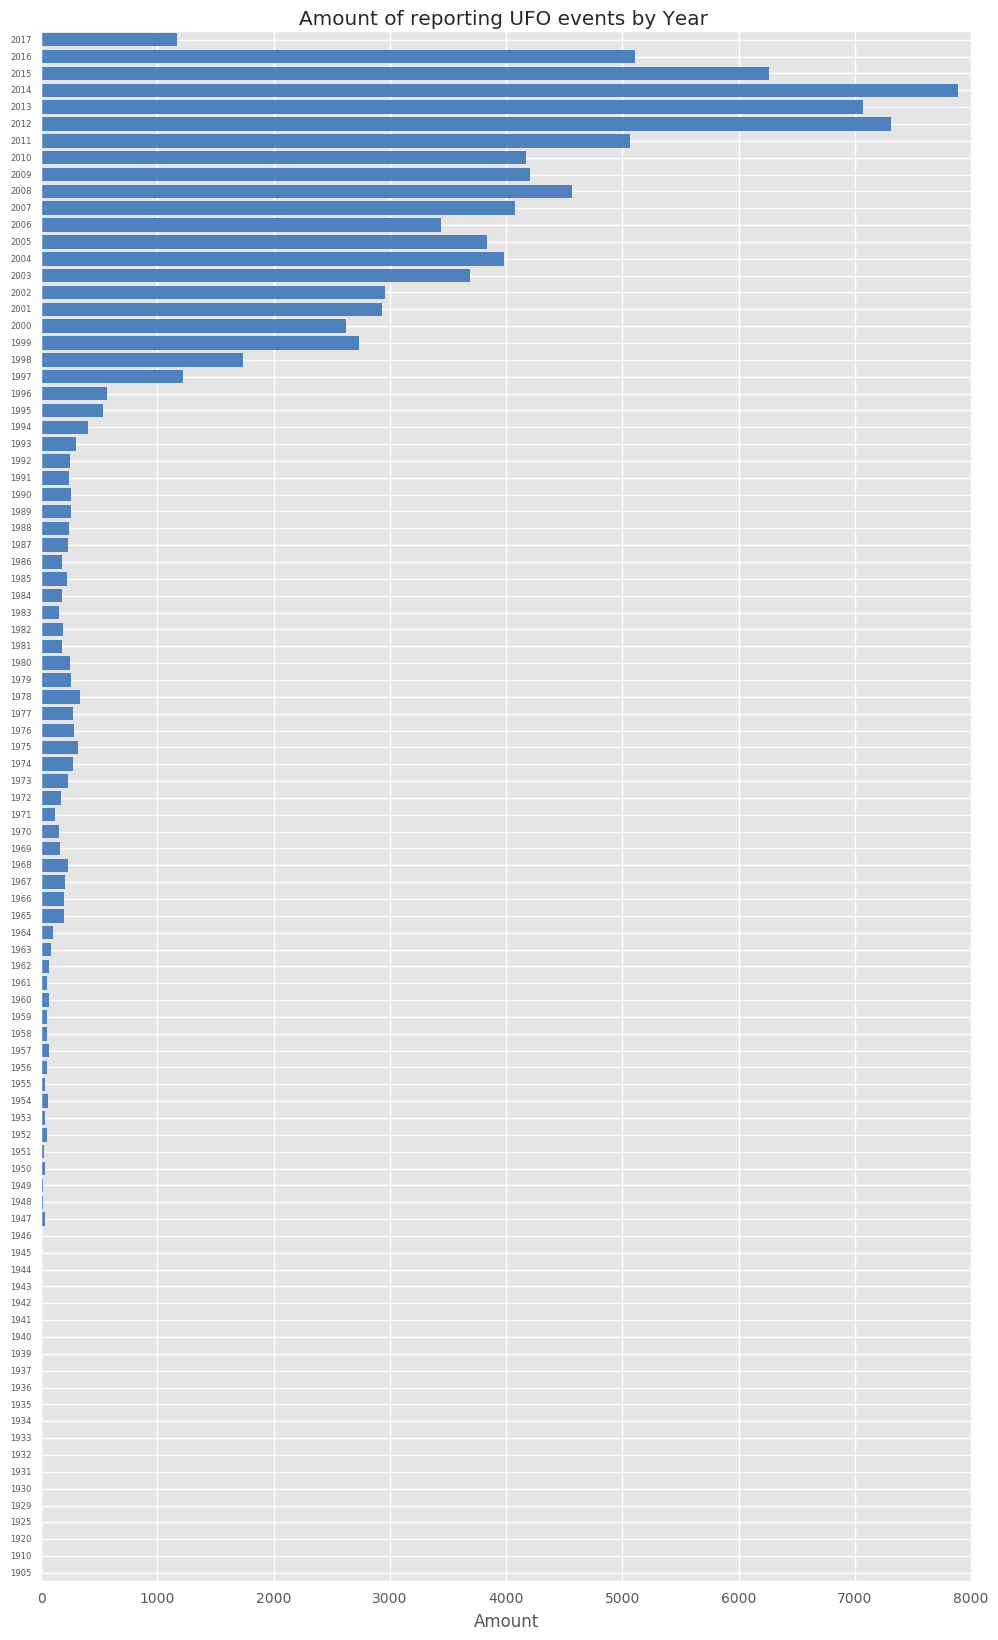

In [38]:
fig, ax = plt.subplots(figsize=(12,20))
# fig, ax1 = plt.subplots(figsize=(12,8))
# fig, axes = plt.subplots(nrows=2, figsize=(12,8))
# fig, axes = plt.subplots(ncols=2, figsize=(18,4))

year = s_year.index
y_pos = np.arange(len(year))
x_value = s_year.values
ax.barh(y_pos, x_value,color='#4F81BD',align='center', label='Amounts', linewidth=0)
ax.set_title('Amount of reporting UFO events by Year ')
ax.set_ylim(-0.5, len(year)-0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(year, rotation = 0, fontsize=6)
ax.set_xlabel('Amount')

plt.savefig('ufo_year.jpg')
plt.show()

**从上图可看出，近年来UFO出现的报告次数最多**

# 1997年以后的UFO事件分析
* 通过上述分析可看出，1997年以前，报告发现UFO的事件相对较少，下面将针对1997年以后的情况进行分析

In [39]:
df_97 = df_clean[(df_clean['Year']>=1997)]
df_97['Year'] = df_97['Year'].astype(int)
# df_97.astype({'Year':int})
print(df_97.shape)
print(df_97.head())

(86041, 13)
             Event_Time  Event_Date  Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle  5-6 minutes   
4      Denver    CO     Light       1 hour   

                                             Summary  \
0    I observed an aircraft that seemed to look odd.   
1  Bridgeview, IL, blue light.  ((anonymous report))   
2                               Silent triangle UFO.   
3  My friend and I stepped outside hoping to catc...  

c:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


将数据按"Year"和"State"进行分组运算，如下：

In [40]:
df_amount_year = df_97.groupby(['Year', 'State'])['Event_Date'].size().reset_index()
df_amount_year.columns = ['Year', 'State', 'Amount']
print(df_amount_year.head())

   Year State  Amount
0  1997    AB       6
1  1997    AK       5
2  1997    AL       8
3  1997    AR      10
4  1997    AZ     127


In [41]:
# import seaborn as sns

# df_pivot = df_amount_year.pivot_table(index='State', columns='Year', values='Amount')
# # print(df_pivot.head())

# f, ax = plt.subplots(figsize = (10, 15))
# cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
# sns.heatmap(df_pivot, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = ax)

# ax.set_title('Amounts per State and Year')
# ax.set_xlabel('Year')
# ax.set_ylabel('State')

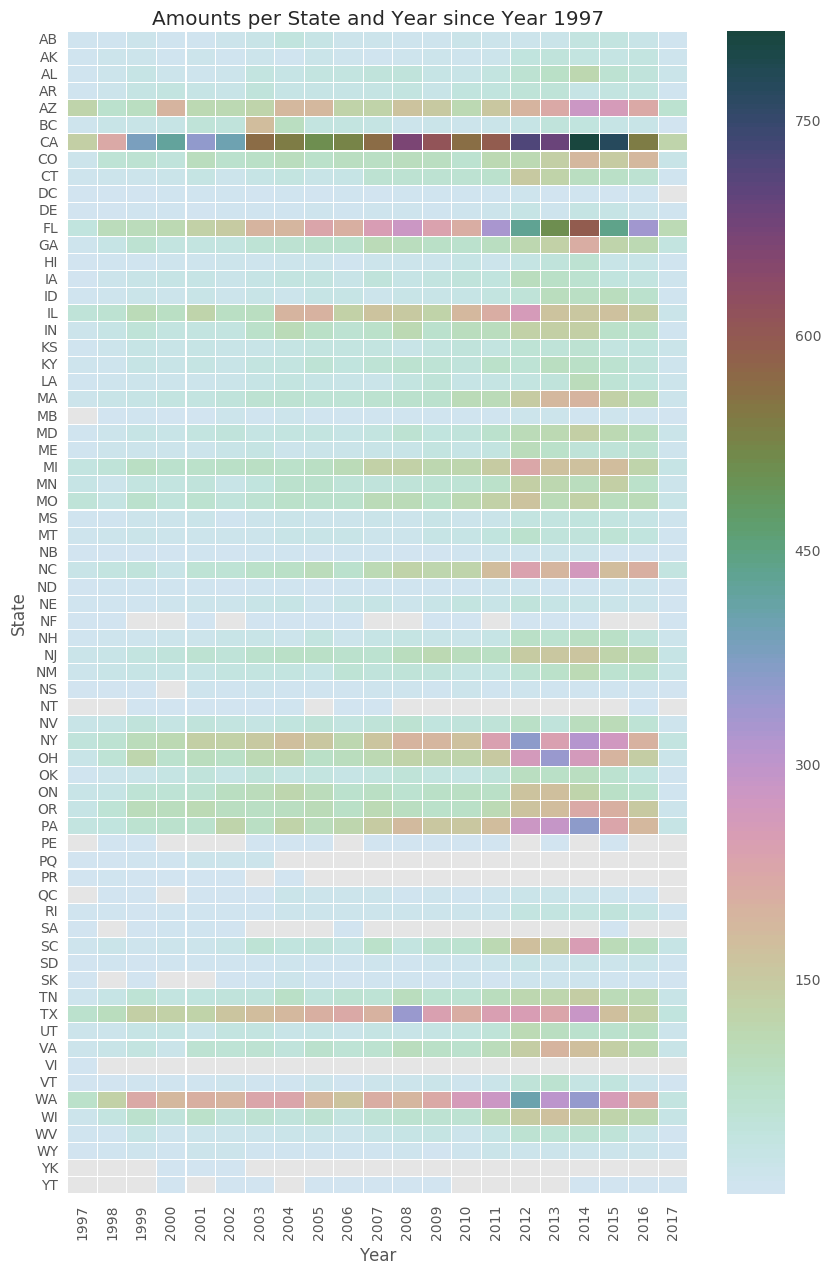

In [42]:
import seaborn as sns

df_pivot = df_amount_year.pivot_table(index='State', columns='Year', values='Amount')

f, ax = plt.subplots(figsize = (10, 15))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(df_pivot, cmap = cmap, linewidths = 0.05, ax = ax)

ax.set_title('Amounts per State and Year since Year 1997')
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
f.savefig('ufo_per_year_state.jpg')

* 上图中，颜色越深的地方，表示UFO事件报告的次数越多。

>原始数据来源于美国的UFO事件报告中心，数据链接如下：

>* Data resource: https://data.world/khturner/national-ufo-reporting-center-reports